In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [2]:
case='MAA13'
year='2011-2013'

dirmean='/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-'+case+'-MEAN/'+year+'/'

title="NACHOS12.L75-"+case+" "+year

fileflxT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_flxT.nc'
fileT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_gridT.nc'
fileEKE=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_EKE.nc'
fileMXL03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_MXL.nc'
fileMXL09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_MXL.nc'
fileICE03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_icemod3.nc'
fileICE09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_icemod3.nc'
filePSI=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_PSI.nc'

dsT=xr.open_dataset(fileT)
tem=dsT.votemper[0]
sal=dsT.vosaline[0]
ssh=dsT.sossheig[0]
lat=dsT.nav_lat
lon=dsT.nav_lon

dsMXL03=xr.open_dataset(fileMXL03)
mxl03_rho010=dsMXL03.somxl010[0]
mxl03_rho030=dsMXL03.somxl030[0]
mxl03_t02=dsMXL03.somxlt02[0]
dsMXL09=xr.open_dataset(fileMXL09)
mxl09_rho010=dsMXL09.somxl010[0]
mxl09_rho030=dsMXL09.somxl030[0]
mxl09_t02=dsMXL09.somxlt02[0]

dsEKE=xr.open_dataset(fileEKE)
eke=dsEKE.voeke[0,0]

dsPSI=xr.open_dataset(filePSI)
psi=dsPSI.sobarstf[0]

dsflxT=xr.open_dataset(fileflxT)
Heat=dsflxT.sohefldo[0]
WaterFlx=dsflxT.sowaflup[0]
WaterDmp=dsflxT.sowafld[0]

dsICE03=xr.open_dataset(fileICE03)
iconc03=dsICE03.siconc[0]
ivolu03=dsICE03.sivolu[0]

dsICE09=xr.open_dataset(fileICE09)
iconc09=dsICE09.siconc[0]
ivolu09=dsICE09.sivolu[0]


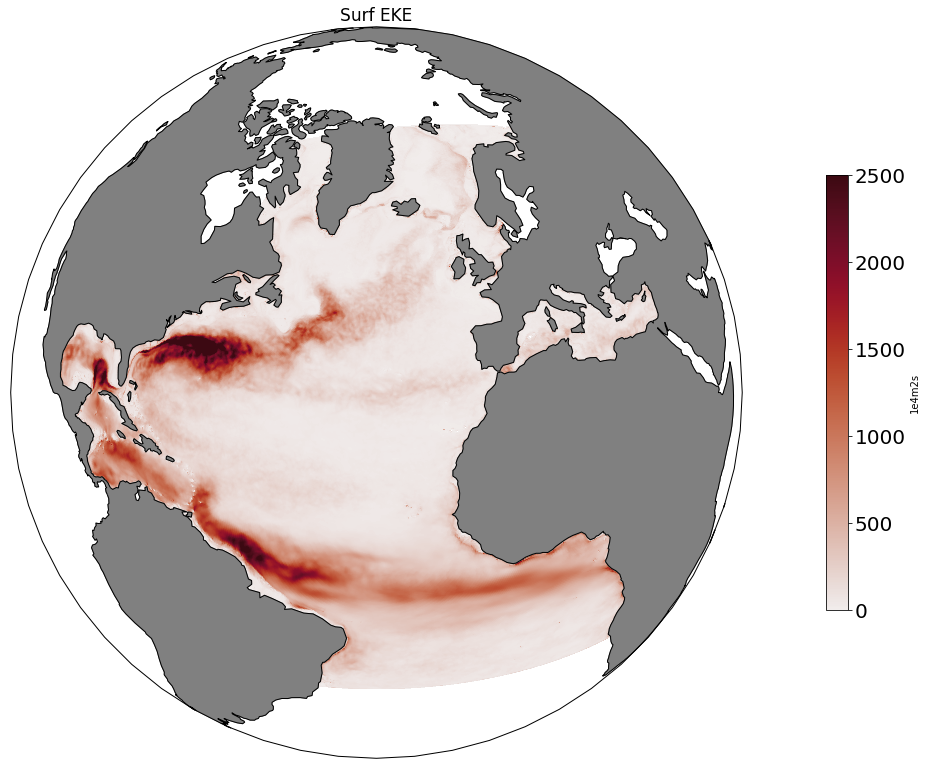

In [4]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
cmap = plt.get_cmap(cmocean.cm.amp)
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(10000*eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label='1e4m2s')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Surf EKE',size=17)


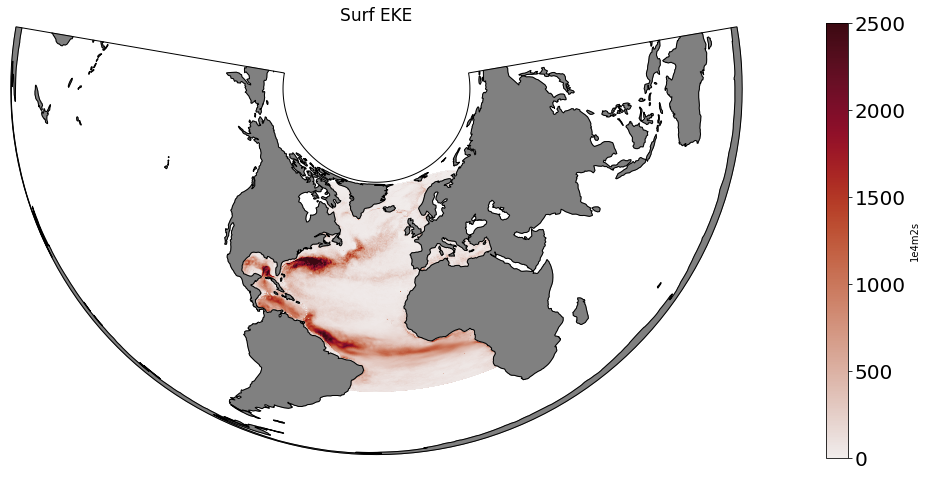

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection=ccrs.AlbersEqualArea(central_longitude=-30.0, central_latitude=35.0,false_easting=0.0, false_northing=0.0, standard_parallels=(20.0, 50.0), globe=None) )
cmap = plt.get_cmap(cmocean.cm.amp)
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(10000*eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label='1e4m2s')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Surf EKE',size=17)


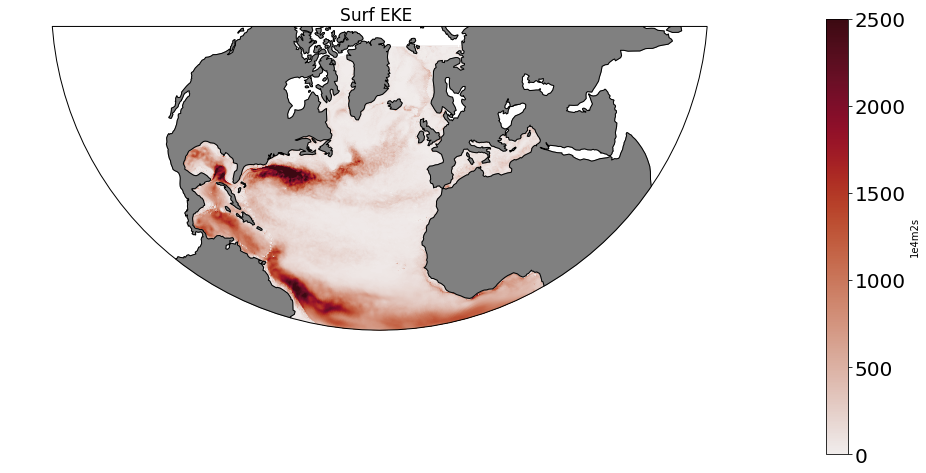

In [22]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection=ccrs.LambertConformal(central_longitude=-30.0, central_latitude=35.0,false_easting=0.0, false_northing=0.0, secant_latitudes=None, standard_parallels=(50,50), globe=None, cutoff=0) )
cmap = plt.get_cmap(cmocean.cm.amp)
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(10000*eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2500)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label='1e4m2s')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Surf EKE',size=17)
